In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Note on input files

I'm not 100% sure these are the right files to use. Check ~/singlecell/krse2013-MT/singlecell_krse2013_bowtie.ipynb and other records.

I think I want the "Gareth" version but currently have only for Pro.

In [2]:
path_pro = '/Users/luke/singlecell/krse2013-MT/fpkm_groups_all_pro.binary.Sta3Surf.Gareth.csv'
path_sar = '/Users/luke/singlecell/krse2013-MT/fpkm_groups_all_sar.binary.Sta3Surf.csv'

In [3]:
df_pro = pd.read_csv(path_pro, index_col=0)
df_sar = pd.read_csv(path_sar, index_col=0)

In [4]:
df_pro.head()

,4415_Sta3_T0_Surf_20,4419_Sta3_T4_Surf_71,4423_Sta3_T8_Surf_75,4427_Sta3_T12_Surf_79,4431_Sta3_T16_Surf_83,4435_Sta3_T20_Surf_87,4439_Sta3_T24_Surf_91,4443_Sta3_T28_Surf_95,4447_Sta3_T32_Surf_99,4451_Sta3_T36_Surf_103,4455_Sta3_T40_Surf_107,4459_Sta3_T44_Surf_111,4463_Sta3_T48_Surf_115,Group
GeneID,,,,,,,,,,,,,,
pro11876,0,1,1,1,1,1,1,1,1,1,1,1,1,RedSea
pro11957,0,0,1,1,1,1,0,0,1,1,1,1,1,RedSea
pro11985,0,1,0,1,1,1,1,1,0,1,1,1,1,RedSea
pro11988,0,1,1,1,1,1,1,1,1,1,1,1,1,RedSea
pro11989,0,1,1,1,1,1,1,1,1,1,1,1,1,RedSea


In [5]:
df_pro.Group.value_counts()

Other     8691
RedSea     637
Name: Group, dtype: int64

In [6]:
df_pro.columns

Index(['4415_Sta3_T0_Surf_20', '4419_Sta3_T4_Surf_71', '4423_Sta3_T8_Surf_75',
       '4427_Sta3_T12_Surf_79', '4431_Sta3_T16_Surf_83',
       '4435_Sta3_T20_Surf_87', '4439_Sta3_T24_Surf_91',
       '4443_Sta3_T28_Surf_95', '4447_Sta3_T32_Surf_99',
       '4451_Sta3_T36_Surf_103', '4455_Sta3_T40_Surf_107',
       '4459_Sta3_T44_Surf_111', '4463_Sta3_T48_Surf_115', 'Group'],
      dtype='object')

In [7]:
# sum over OGs for each timepoint to find out which timepoint is low: T0!
df_pro.ix[:,0:13].sum(axis=0)

4415_Sta3_T0_Surf_20        53
4419_Sta3_T4_Surf_71      1992
4423_Sta3_T8_Surf_75      2005
4427_Sta3_T12_Surf_79     2063
4431_Sta3_T16_Surf_83     2028
4435_Sta3_T20_Surf_87     2077
4439_Sta3_T24_Surf_91     2025
4443_Sta3_T28_Surf_95     1977
4447_Sta3_T32_Surf_99     1884
4451_Sta3_T36_Surf_103    2119
4455_Sta3_T40_Surf_107    2026
4459_Sta3_T44_Surf_111    2036
4463_Sta3_T48_Surf_115    2043
dtype: int64

In [8]:
df_pro.drop('4415_Sta3_T0_Surf_20', axis=1, inplace=True)

In [9]:
# sum over timepoints for each OG to get total number of timepoints observed in
df_pro['Sum'] = df_pro.ix[:,0:13].sum(axis=1)

In [10]:
df_pro.Sum.value_counts()

0     7136
12    1832
11      83
1       61
10      35
2       35
8       27
5       23
7       22
4       22
9       19
6       18
3       15
Name: Sum, dtype: int64

In [11]:
df_pro_nonzero = df_pro[df_pro.Sum > 0]

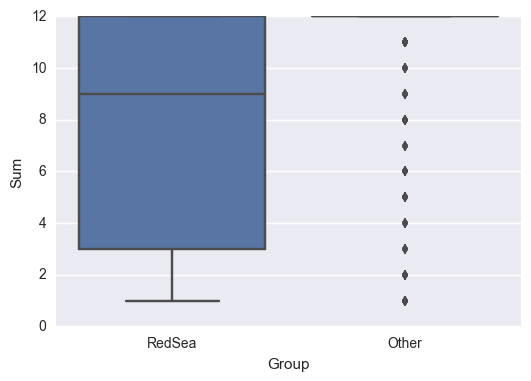

In [12]:
sns.boxplot(x=df_pro_nonzero.Group, y=df_pro_nonzero.Sum)

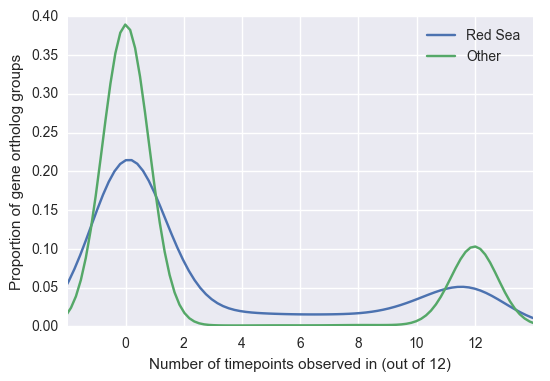

In [15]:
sns.kdeplot(data=df_pro.Sum[df_pro.Group == 'RedSea'], label='Red Sea')
sns.kdeplot(data=df_pro.Sum[df_pro.Group == 'Other'], label='Other')
plt.axis([-1.99, 13.99, 0, 0.4])
plt.xlabel('Number of timepoints observed in (out of 12)')
plt.ylabel('Proportion of gene ortholog groups')